In [1]:
%reset -f

In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Allow display of all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Understanding

In [3]:
# loading the datasets
train_df = pd.read_csv('house-prices/train.csv')
test_df = pd.read_csv('house-prices/test.csv')

train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1006,1007,20,RL,NA,12155,Pave,NA,IR3,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,6,3,1970,1970,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,LwQ,1237,Unf,0,420,1657,GasA,Gd,Y,SBrkr,1657,0,0,1657,0,1,2,0,3,1,TA,7,Typ,1,TA,Attchd,1970,Unf,2,484,TA,TA,Y,0,0,0,0,147,0,NA,NA,NA,0,3,2007,WD,Normal,163500
486,487,20,RL,79,10289,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,BrkFace,168,TA,TA,CBlock,TA,TA,No,ALQ,836,Unf,0,237,1073,GasA,TA,Y,SBrkr,1073,0,0,1073,1,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1965,RFn,2,515,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2007,WD,Normal,156000
193,194,160,RM,24,2522,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,NA,Detchd,2004,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,5,2006,WD,Normal,130000
226,227,60,RL,82,9950,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,290,Gd,TA,PConc,Gd,TA,No,GLQ,565,Unf,0,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0,2520,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1995,RFn,3,721,TA,TA,Y,224,114,0,0,0,0,NA,NA,NA,0,6,2007,WD,Abnorml,290000
883,884,75,RL,60,6204,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,2.5Fin,4,5,1912,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Gd,TA,PConc,TA,Fa,No,Unf,0,Unf,0,795,795,GasA,TA,N,SBrkr,954,795,481,2230,1,0,1,0,5,1,TA,10,Typ,0,NA,Detchd,1997,Unf,1,440,TA,Gd,Y,0,188,0,0,0,0,NA,NA,NA,0,3,2006,WD,Normal,118500
489,490,180,RM,21,1526,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,8,1970,2002,Gable,CompShg,CemntBd,CmentBd,None,0,TA,Gd,CBlock,Gd,TA,Av,GLQ,515,Unf,0,115,630,GasA,TA,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Gd,3,Typ,0,NA,Attchd,1970,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,5,2009,WD,Normal,86000
938,939,60,RL,73,8760,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Mn,GLQ,464,Unf,0,927,1391,GasA,Ex,Y,SBrkr,1391,571,0,1962,0,0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,2006,RFn,3,868,TA,TA,Y,0,90,0,0,0,0,NA,NA,NA,0,8,2006,New,Partial,239799
622,623,20,RL,71,7064,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,153,TA,TA,CBlock,TA,TA,No,BLQ,560,Unf,0,420,980,GasA,TA,Y,SBrkr,980,0,0,980,0,0,1,0,3,1,TA,6,Typ,0,NA,Detchd,1986,Unf,2,484,TA,TA,Y,192,0,0,0,0,0,NA,NA,NA,0,7,2009,WD,Normal,135000
894,895,90,RL,64,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,Slab,NA,NA,NA,NA,0,NA,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NA,Attchd,1979,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2009,WD,Alloca,118858
608,609,70,RL,78,12168,Pave,NA,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,6,1934,1998,Gable,CompShg,BrkFace,Wd Sdng,None,0,TA,TA,PConc,Gd,TA,Mn,BLQ,428,Unf,0,537,965,GasA,TA,Y,SBrkr,1940,1254,0,3194,0,0,2,1,4,1,TA,10,Typ,2,Gd,Basment,1934,Unf,2,380,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA

In [4]:
test_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
661,2122,50,RM,52,6240,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,7,1929,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,PConc,TA,TA,No,BLQ,80,Unf,0,624,704,GasA,Ex,Y,SBrkr,624,512,0,1136,0,1,1,0,2,1,TA,6,Typ,0,NA,Detchd,1990,Unf,1,336,TA,TA,Y,0,365,80,0,0,0,NA,NA,NA,0,8,2008,WD,Normal
153,1614,120,RM,31,2394,Pave,NA,Reg,Low,AllPub,Inside,Mod,MeadowV,Norm,Norm,Twnhs,1Story,5,6,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0,TA,TA,CBlock,Gd,TA,Gd,GLQ,915,Unf,0,30,945,GasA,Ex,Y,SBrkr,945,0,0,945,1,1,1,0,2,1,TA,5,Typ,1,Po,Attchd,1973,RFn,1,253,TA,TA,Y,174,0,56,0,108,0,NA,NA,NA,0,5,2010,WD,Normal
1380,2841,60,RL,68,9272,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,TA,No,GLQ,500,Unf,0,342,842,GasA,Ex,Y,SBrkr,856,893,0,1749,0,0,2,1,3,1,Gd,7,Typ,0,NA,Attchd,1999,RFn,2,515,TA,TA,Y,140,85,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal
67,1528,50,RL,60,8064,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,8,1948,2004,Gable,CompShg,WdShing,Wd Shng,None,0,TA,TA,CBlock,TA,TA,No,ALQ,481,Rec,174,161,816,GasA,TA,Y,SBrkr,816,408,0,1224,1,0,1,0,3,1,TA,5,Typ,0,NA,Detchd,1950,Unf,1,280,TA,TA,Y,414,0,0,0,0,0,NA,GdWo,NA,0,5,2010,WD,Normal
246,1707,20,FV,90,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NA,NA,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1436,1436,GasA,Ex,Y,SBrkr,1436,0,0,1436,0,0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008,Fin,2,529,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,Partial
741,2202,70,RL,54,7609,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,8,9,1925,1997,Gable,CompShg,Stucco,Stucco,None,0,Gd,Gd,PConc,Fa,TA,No,ALQ,406,Unf,0,392,798,GasA,Ex,Y,SBrkr,798,714,0,1512,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Detchd,1925,Unf,1,180,TA,TA,P,85,16,41,0,0,0,NA,GdPrv,NA,0,6,2008,WD,Normal
1283,2744,20,RL,72,10152,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1956,1994,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,Av,BLQ,914,Unf,0,210,1124,GasA,Ex,Y,SBrkr,1124,0,0,1124,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1956,Fin,1,353,TA,TA,Y,0,211,180,0,142,0,NA,NA,NA,0,5,2006,WD,Normal
279,1740,120,FV,NA,3830,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,6,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,280,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1726,1726,GasA,Ex,Y,SBrkr,1726,0,0,1726,0,0,2,1,2,1,Gd,6,Typ,1,Gd,Attchd,2008,Fin,2,561,TA,TA,Y,0,254,0,0,0,0,NA,NA,NA,0,1,2009,New,Partial
116,1577,20,RL,64,7360,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2010,2010,Gable,CompShg,VinylSd,VinylSd,Stone,80,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1198,1222,GasA,Ex,Y,SBrkr,1222,0,0,1222,0,0,2,0,2,1,Gd,6,Typ,0,NA,Attchd,2009,RFn,2,615,TA,TA,Y,0,54,0,0,0,0,NA,NA,NA,0,3,2010,WD,Normal
466,1927,20,RL,75,12518,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1968,1968,Gable,CompShg,HdBoard,HdBoard,BrkFace,182,TA,TA,CBlock,TA,TA,No,ALQ,532,Unf,0,476,1008,GasA,Gd,Y,SBrkr,1008,0,0,1008,0,0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1968,Unf,1,384,TA,TA,Y,144,0,0,0,0,0,NA,MnPrv,NA,0,4,2009,WD,Normal


In [5]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1460 non-null   int64 
 1   MSSubClass      1460 non-null   int64 
 2   MSZoning        1460 non-null   object
 3   LotFrontage     1460 non-null   object
 4   LotArea         1460 non-null   int64 
 5   Street          1460 non-null   object
 6   Alley           1460 non-null   object
 7   LotShape        1460 non-null   object
 8   LandContour     1460 non-null   object
 9   Utilities       1460 non-null   object
 10  LotConfig       1460 non-null   object
 11  LandSlope       1460 non-null   object
 12  Neighborhood    1460 non-null   object
 13  Condition1      1460 non-null   object
 14  Condition2      1460 non-null   object
 15  BldgType        1460 non-null   object
 16  HouseStyle      1460 non-null   object
 17  OverallQual     1460 non-null   int64 
 18  OverallC

In [8]:
train_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

### 1. Checking for Completeness

In [10]:
# checking for missing values
train_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [11]:
# check for missing data
missing_values = train_df.isnull().sum()
percent_missing = train_df.isnull().sum()/train_df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame = pd.DataFrame(value)
frame

,missing_values,percent_missing %
Id,0,0.0
MSSubClass,0,0.0
MSZoning,0,0.0
LotFrontage,0,0.0
LotArea,0,0.0
Street,0,0.0
Alley,0,0.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,0.0


In [12]:
# dropping columns with more than 50% missing values
train_df = train_df.dropna(thresh=0.5*len(train_df), axis=1)

In [13]:
train_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1460 non-null   int64 
 1   MSSubClass      1460 non-null   int64 
 2   MSZoning        1460 non-null   object
 3   LotFrontage     1460 non-null   object
 4   LotArea         1460 non-null   int64 
 5   Street          1460 non-null   object
 6   Alley           1460 non-null   object
 7   LotShape        1460 non-null   object
 8   LandContour     1460 non-null   object
 9   Utilities       1460 non-null   object
 10  LotConfig       1460 non-null   object
 11  LandSlope       1460 non-null   object
 12  Neighborhood    1460 non-null   object
 13  Condition1      1460 non-null   object
 14  Condition2      1460 non-null   object
 15  BldgType        1460 non-null   object
 16  HouseStyle      1460 non-null   object
 17  OverallQual     1460 non-null   int64 
 18  OverallC

In [15]:
# dealing with missing values in numerical columns
for col in train_df.columns:
    if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
        train_df[col].fillna(train_df[col].median(), inplace=True)
    elif train_df[col].dtype == 'object':
        train_df[col].fillna('Missing', inplace=True)

In [16]:
# checking for missing values
train_df.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


### 2. Checking for Consistency

In [17]:
# checking for duplicates
train_df.duplicated().sum()

0

### 3. Checking for Uniformity

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1460 non-null   int64 
 1   MSSubClass      1460 non-null   int64 
 2   MSZoning        1460 non-null   object
 3   LotFrontage     1460 non-null   object
 4   LotArea         1460 non-null   int64 
 5   Street          1460 non-null   object
 6   Alley           1460 non-null   object
 7   LotShape        1460 non-null   object
 8   LandContour     1460 non-null   object
 9   Utilities       1460 non-null   object
 10  LotConfig       1460 non-null   object
 11  LandSlope       1460 non-null   object
 12  Neighborhood    1460 non-null   object
 13  Condition1      1460 non-null   object
 14  Condition2      1460 non-null   object
 15  BldgType        1460 non-null   object
 16  HouseStyle      1460 non-null   object
 17  OverallQual     1460 non-null   int64 
 18  OverallC

In [19]:
train_df.columns = train_df.columns.str.strip()

In [20]:
train_df['MSSubClass'].astype('object')

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
30       70
31       20
32       20
33       20
34      120
35       60
36       20
37       20
38       20
39       90
40       20
41       20
42       85
43       20
44       20
45      120
46       50
47       20
48      190
49       20
50       60
51       50
52       90
53       20
54       80
55       20
56      160
57       60
58       60
59       20
60       20
61       75
62      120
63       70
64       60
65       60
66       20
67       20
68       30
69       50
70       20
71       20
72       60
73       20
74       50
75      180
76       20
77       50
78       90
79       50
80       60
81      120
82       20
83  

In [21]:
train_df['MSSubClass'].value_counts()  

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [22]:
train_df['MSZoning'].value_counts()

RL           1151
RM            218
FV             65
RH             16
C (all)        10
Name: MSZoning, dtype: int64

### 4. Checking for Validity

<Axes: >

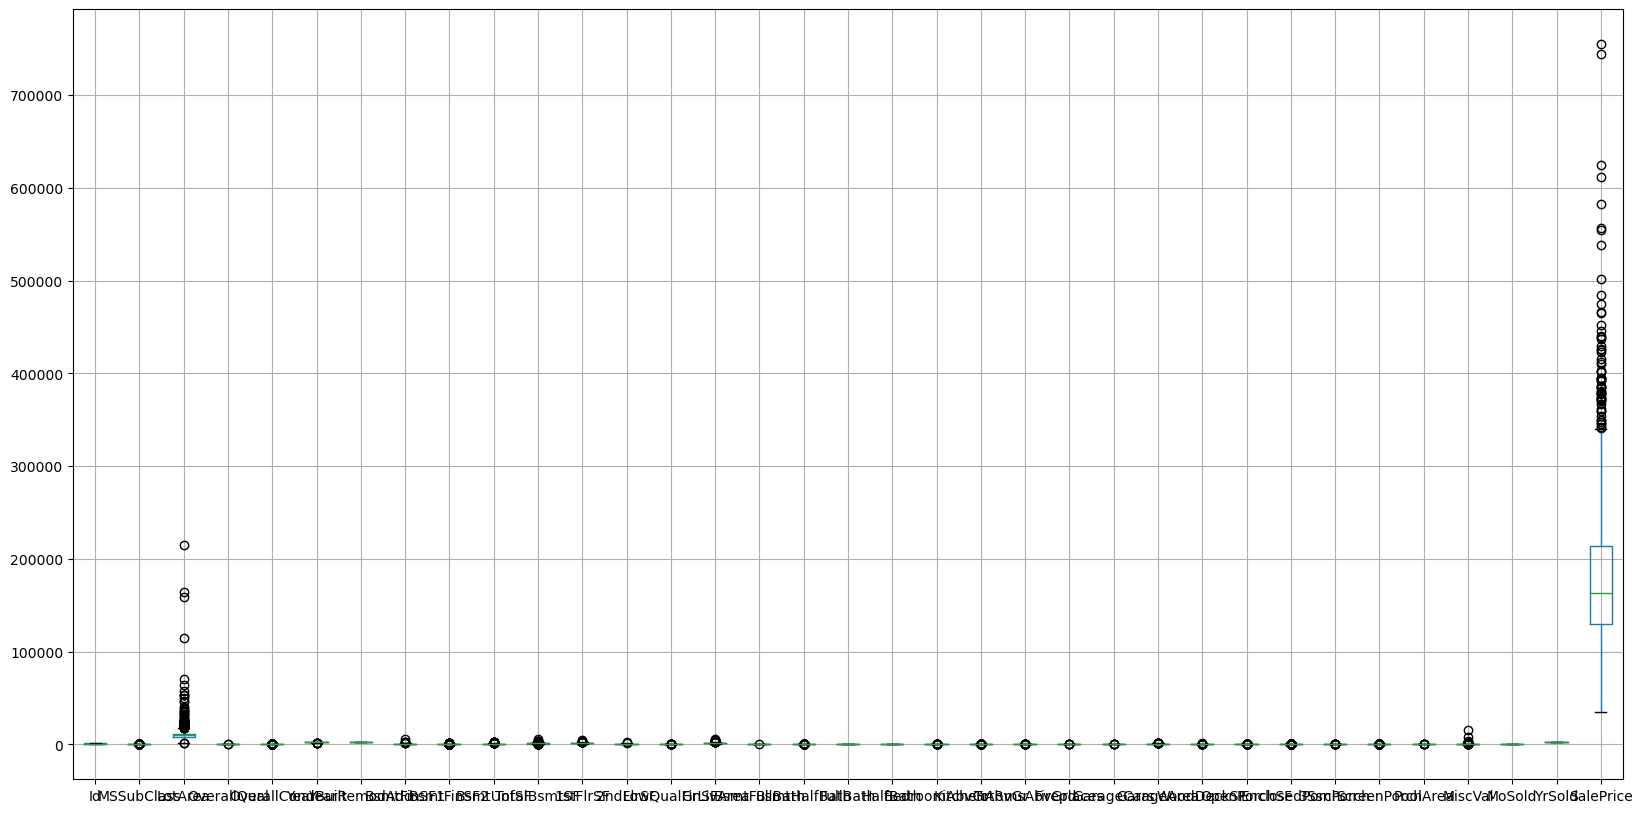

In [23]:
# checking for validity ie outliers
train_df.boxplot(figsize=(20,10))

In [24]:
# function to detect outliers and remove them

def check_handle_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

# checking and handling outliers in the numerical columns

#for col in train_df.columns:
#    if train_df[col].dtype == 'int64' or train_df[col].dtype == 'float64':
#        train_df = check_handle_outlier(train_df,col)

In [25]:
train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
193,194,160,RM,24,2522,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7,Maj1,0,NA,Detchd,2004,Unf,2,380,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,5,2006,WD,Normal,130000
1136,1137,50,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,6,5,1950,1950,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,BLQ,280,Unf,0,752,1032,GasA,TA,Y,FuseA,1032,220,0,1252,0,0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1950,Unf,1,288,TA,TA,Y,0,0,96,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,119000
760,761,20,RL,70,9100,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,No,Rec,612,Unf,0,252,864,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,2008,Unf,1,300,Ex,Ex,Y,0,0,0,0,0,0,NA,NA,Shed,450,10,2009,WD,Normal,127500
989,990,60,FV,65,8125,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,No,Unf,0,Unf,0,770,770,GasA,Ex,Y,SBrkr,778,798,0,1576,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,2006,RFn,2,614,TA,TA,Y,0,50,0,0,0,0,NA,NA,NA,0,8,2006,New,Partial,197000
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
803,804,60,RL,107,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NA,NA,NA,0,1,2009,New,Partial,582933
773,774,20,RL,70,10150,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1958,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,COD,Normal,114500
744,745,120,RL,41,5395,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,GLQ,733,Unf,0,604,1337,GasA,Gd,Y,SBrkr,1337,0,0,1337,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1993,RFn,2,462,TA,TA,Y,96,0,70,168,0,0,NA,NA,NA,0,10,2008,WD,Normal,180000
804,805,20,RL,75,9000,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NA,Attchd,1954,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,6,2006,WD,Family,118000
833,834,20,RL,100,10004,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1964,1964,Gable,CompShg,HdBoard,Plywood,BrkFace,180,TA,TA,CBlock,TA,TA,No,Rec,196,BLQ,345,975,1516,GasA,TA,Y,SBrkr,1516,0,0,1516,0,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1964,RFn,2,472,TA,TA,Y,0,0,0,0,

## Feature Engineering

#### 1. Encoding Categorical Variables

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col] = le.fit_transform(train_df[col])

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int64
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int64
 6   Alley          1460 non-null   int64
 7   LotShape       1460 non-null   int64
 8   LandContour    1460 non-null   int64
 9   Utilities      1460 non-null   int64
 10  LotConfig      1460 non-null   int64
 11  LandSlope      1460 non-null   int64
 12  Neighborhood   1460 non-null   int64
 13  Condition1     1460 non-null   int64
 14  Condition2     1460 non-null   int64
 15  BldgType       1460 non-null   int64
 16  HouseStyle     1460 non-null   int64
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   int64
 19  YearBu

#### 2. Feature Scaling

In [28]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
train_df_scaled = scaler.fit_transform(train_df)

In [29]:
train_df_scaled = pd.DataFrame(train_df_scaled, columns=train_df.columns)
train_df_scaled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,-0.094172,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,1.050994,0.878668,-0.491516,-0.125797,0.743092,0.751626,-1.378962,0.221666,-0.777976,0.364207,0.835599,-0.566939,0.325405,0.678263,-0.510942,0.575425,0.344051,-0.288653,-0.944591,-0.459303,-0.123046,-0.884658,0.263813,0.304256,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,0.912210,0.255978,-0.951226,-0.075117,-0.768736,0.912206,0.103495,0.311725,0.351000,0.315602,0.295349,0.289745,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.477754,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,-0.225716,1.954302,-1.188074,-0.03174,-0.411691,-0.543457,-0.071836,2.179628,0.156734,-0.429577,-0.491516,-0.125797,-0.508251,-0.661060,0.533897,-0.641326,0.663451,0.364207,-0.549162,-0.566939,0.325405,-1.235906,-1.399536,1.171992,0.344051,-0.288653,-0.641228,0.466465,-0.123046,-0.884658,0.263813,0.304256,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,0.795629,-0.318683,0.255978,0.600495,1.638498,-0.768736,-0.184143,0.103495,0.311725,-0.060731,0.315602,0.295349,0.289745,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.020213,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,0.984752,0.830215,-0.491516,-0.125797,0.743092,0.751626,-1.378962,-0.035177,-0.777976,0.364207,0.835599,-0.566939,0.325405,-0.597850,-0.510942,0.092907,0.344051,-0.288653,-0.301643,-0.313369,-0.123046,-0.884658,0.263813,0.304256,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.409369,-0.318683,0.255978,0.600495,1.638498,-0.768736,0.830995,0.103495,0.311725,0.631726,0.315602,0.295349,0.289745,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,-0.284814,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,-0.225716,-1.039872,-0.036289,-0.03174,-0.411691,1.026689,0.651479,-0.517200,-1.863632,-0.720298,-0.491516,-0.125797,1.055928,1.316701,0.533897,-0.641326,0.663451,0.364207,-1.933923,0.997770,-2.834848,0.678263,-1.399536,-0.499274,0.344051,-0.288653,-0.061670,-0.687324,-0.123046,0.265476,0.263813,0.304256,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.409369,0.296763,0.255978,0.600495,-0.931925,1.301075,0.709179,0.942959,1.650307,0.790804,0.315602,0.295349,0.289745,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.630268,0.375148,0.064238,0.02

In [30]:
# Splitting the data into features and labels
X_train = train_df_scaled.drop('SalePrice', axis=1)
y_train = train_df_scaled['SalePrice']

X_test = test_df

## Modeling

In [31]:
# Baseline Xgboost model
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
# fitting the model
model = XGBRegressor()
model.fit(X_train, y_train)

# cross validating the model
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores.mean())

0.8699782649495426


The Baseline model performs relatively well with a cross validation score of 87%

<Figure size 3000x1500 with 0 Axes>

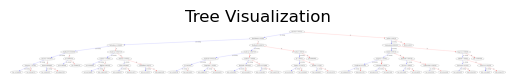

In [33]:
# create a visualisation of the model
from xgboost import plot_tree


plt.figure(figsize=(30, 15), dpi=100)

# Plot the tree
plot_tree(model, num_trees=10)

# Add labels and title for clarity
plt.xlabel('Nodes')
plt.ylabel('Depth')
plt.title('Tree Visualization')

# Display the plot
plt.show()

plt.savefig('tree.png')

In [34]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# defining the parameters to be tuned
params = {
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'n_estimators': [100, 200, 300, 400, 500]
}

# best parameters
grid = GridSearchCV(model, params, cv=5)
grid.fit(X_train, y_train)

# best parameters
grid.best_params_


{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

In [35]:
# fitting the model with the best parameters
tuned_model = XGBRegressor(learning_rate=0.05, max_depth=3, n_estimators=500)
tuned_model.fit(X_train, y_train)

# cross validating the model
scores = cross_val_score(tuned_model, X_train, y_train, cv=5)
print(scores.mean())

0.8930943514761429


After hyperparameter tuning, the model performs better with a cross validation score of 88% 

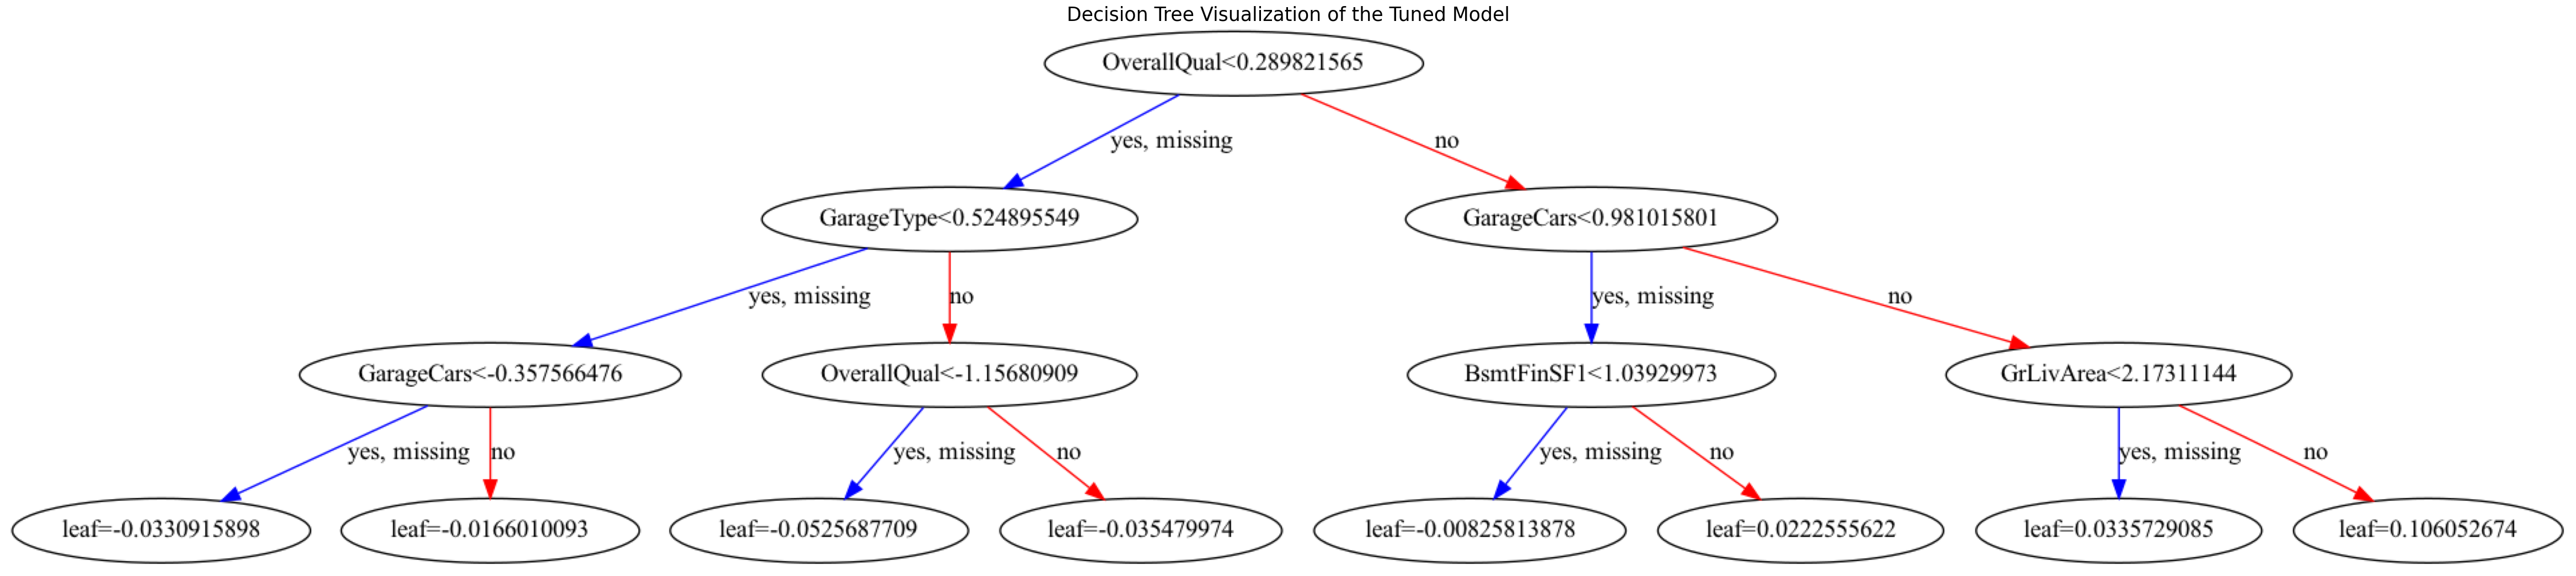

In [54]:
plt.style.use('ggplot') 

fig, ax = plt.subplots(figsize=(60, 20), dpi=100)

# Plot the tree
plot_tree(tuned_model, num_trees=10, ax=ax)

# Add labels and title for clarity
ax.set_xlabel('Nodes', fontsize=20)
ax.set_ylabel('Depth', fontsize=20)
ax.set_title('Decision Tree Visualization of the Tuned Model', fontsize=25)

# Save the figure before showing it
plt.savefig('tree.png')

# Display the plot
plt.show()

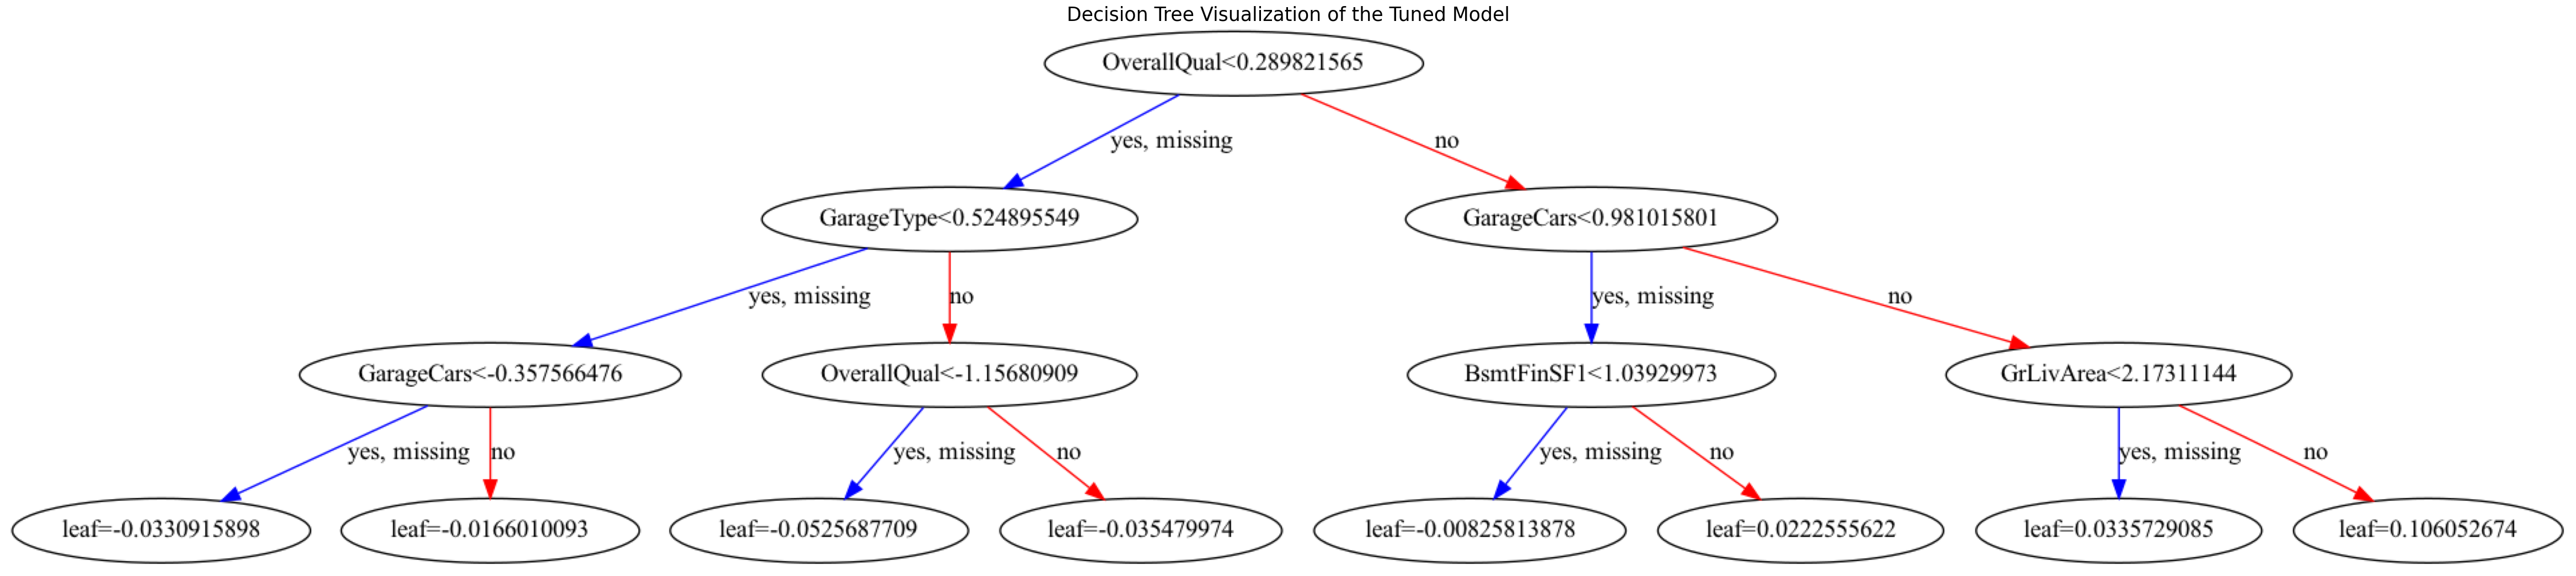

In [53]:

plt.style.use('ggplot') 

fig, ax = plt.subplots(figsize=(60, 20), dpi=100)

# Plot the tree
plot_tree(tuned_model, num_trees=10, ax=ax)

# Add labels and title for clarity
ax.set_xlabel('Nodes', fontsize=20)
ax.set_ylabel('Depth', fontsize=20)
ax.set_title('Decision Tree Visualization of the Tuned Model', fontsize=25)

# Save the figure before showing it
plt.savefig('tuned_tree.png')

# Display the plot
plt.show()

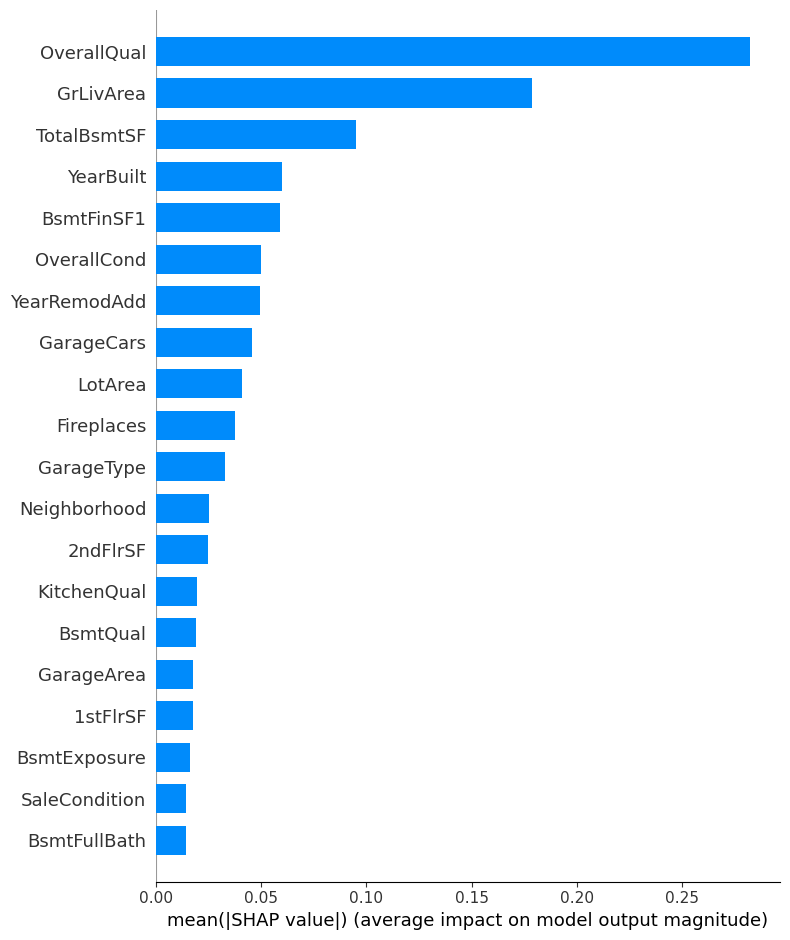

In [37]:
# Use SHAP for model explainability
import shap

explainer = shap.Explainer(tuned_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# save the plot
shap.save_html('shap.html', shap_values, X_train)

In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1459 non-null   int64 
 1   MSSubClass      1459 non-null   int64 
 2   MSZoning        1459 non-null   object
 3   LotFrontage     1459 non-null   object
 4   LotArea         1459 non-null   int64 
 5   Street          1459 non-null   object
 6   Alley           1459 non-null   object
 7   LotShape        1459 non-null   object
 8   LandContour     1459 non-null   object
 9   Utilities       1459 non-null   object
 10  LotConfig       1459 non-null   object
 11  LandSlope       1459 non-null   object
 12  Neighborhood    1459 non-null   object
 13  Condition1      1459 non-null   object
 14  Condition2      1459 non-null   object
 15  BldgType        1459 non-null   object
 16  HouseStyle      1459 non-null   object
 17  OverallQual     1459 non-null   int64 
 18  OverallC

In [39]:
X_test.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [40]:
X_test.columns

Index(['Id   ', 'MSSubClass ', 'MSZoning ', 'LotFrontage ', 'LotArea ',
       'Street ', 'Alley ', 'LotShape ', 'LandContour ', 'Utilities ',
       'LotConfig ', 'LandSlope ', 'Neighborhood ', 'Condition1 ',
       'Condition2 ', 'BldgType ', 'HouseStyle ', 'OverallQual ',
       'OverallCond ', 'YearBuilt ', 'YearRemodAdd ', 'RoofStyle ',
       'RoofMatl ', 'Exterior1st ', 'Exterior2nd ', 'MasVnrType ',
       'MasVnrArea ', 'ExterQual ', 'ExterCond ', 'Foundation ', 'BsmtQual ',
       'BsmtCond ', 'BsmtExposure ', 'BsmtFinType1 ', 'BsmtFinSF1 ',
       'BsmtFinType2 ', 'BsmtFinSF2 ', 'BsmtUnfSF ', 'TotalBsmtSF ',
       'Heating ', 'HeatingQC ', 'CentralAir ', 'Electrical ', '1stFlrSF ',
       '2ndFlrSF ', 'LowQualFinSF ', 'GrLivArea ', 'BsmtFullBath ',
       'BsmtHalfBath ', 'FullBath ', 'HalfBath ', 'BedroomAbvGr ',
       'KitchenAbvGr ', 'KitchenQual ', 'TotRmsAbvGrd ', 'Functional ',
       'Fireplaces ', 'FireplaceQu ', 'GarageType ', 'GarageYrBlt ',
       'GarageFinish 

In [ ]:
# Dropping columns that had more than 50% missing values in the training set
X_test.drop('PoolQC ', axis=1, inplace=True)
X_test.drop('Fence ', axis=1, inplace=True)
X_test.drop('MiscVal ', axis=1, inplace=True)
X_test.drop('Alley ', axis=1, inplace=True)

In [41]:
X_test.shape

(1459, 80)

In [ ]:
X_test['MSSubClass '].astype('object')

In [43]:
X_test.columns = X_test.columns.str.strip()

In [44]:
# label encoding the categorical columns
for col in X_test.columns:
    if X_test[col].dtype == 'object':
        X_test[col] = le.fit_transform(X_test[col])

In [45]:
# scaling the data
X_test_scaled = scaler.fit_transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730864,-0.874711,-1.071528,0.536966,0.363929,0.06426,0.083814,0.742620,0.31870,-0.03705,0.572445,-0.207992,-0.105672,-1.193183,0.028691,-0.426625,-0.431830,-0.751101,0.400766,-0.340945,-1.072885,-0.474315,-0.09948,0.721792,0.749936,0.530418,-0.632409,0.673548,0.388852,-0.533007,1.008900,0.341573,0.675547,0.804294,0.556134,-1.873442,0.365961,-0.211783,1.127085,-0.084379,1.415522,0.272716,0.296079,-0.654561,-0.775254,-0.080483,-1.215588,-0.804258,-0.252105,-1.028720,-0.751040,-1.029543,-0.20391,0.884556,-0.918335,0.264993,-0.898055,-0.049484,-0.766829,-0.741611,0.930000,-0.981782,1.472597,0.337786,0.29175,0.339114,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,0.043675,-1.348162,-0.175956,-0.092244,-0.038281,1.713905,0.318147,0.201383
1,-1.728490,-0.874711,0.044360,0.574109,0.897861,0.06426,0.083814,-1.384637,0.31870,-0.03705,-1.950811,-0.207992,-0.105672,-0.056113,0.028691,-0.426625,-0.431830,-0.054877,0.400766,-0.439695,-1.214908,2.006065,-0.09948,1.072239,1.030776,-1.421359,-0.542647,0.673548,0.388852,-0.533007,1.008900,0.341573,0.675547,-1.449768,1.760441,0.363343,-0.320207,0.247355,-0.831781,-0.084379,1.415522,0.272716,0.296079,0.433298,-0.775254,-0.080483,-0.323539,-0.804258,-0.252105,-1.028720,1.237648,0.175997,-0.20391,-0.685477,-0.255371,0.264993,-0.898055,-0.049484,-0.766829,-0.860002,0.930000,-0.981782,-0.877687,0.337786,0.29175,0.339114,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,0.043675,0.470579,-2.997051,19.730438,-0.038281,1.713905,0.318147,0.201383
2,-1.726115,0.061351,0.044360,0.314104,0.809646,0.06426,0.083814,-1.384637,0.31870,-0.03705,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.751101,-0.497418,0.844059,0.678742,-0.474315,-0.09948,0.721792,0.749936,0.530418,-0.632409,0.673548,0.388852,0.833702,-0.514106,0.341573,0.675547,-0.548143,1.470515,0.363343,-0.320207,-1.028965,1.263354,-0.084379,0.269754,0.272716,0.296079,-0.574165,0.891944,-0.080483,0.294508,-0.804258,-0.252105,0.773083,1.237648,0.175997,-0.20391,0.884556,-0.255371,0.264993,0.647066,1.733149,-0.766829,0.679076,-1.543031,0.294885,0.059081,0.337786,0.29175,0.339114,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,0.043675,-1.348162,-0.175956,-0.092244,-1.140614,1.713905,0.318147,0.201383
3,-1.723741,0.061351,0.044360,0.462679,0.032064,0.06426,0.083814,-1.384637,0.31870,-0.03705,0.572445,-0.207992,-0.784114,-0.056113,0.028691,-0.426625,0.920188,-0.054877,0.400766,0.876976,0.678742,-0.474315,-0.09948,0.721792,0.749936,-1.421359,0.265210,0.673548,0.388852,0.833702,1.008900,0.341573,0.675547,-0.548143,0.962030,0.363343,-0.320207,-0.034867,1.259095,-0.084379,-0.876014,0.272716,0.296079,-0.579190,0.837243,-0.080483,0.243004,-0.804258,-0.252105,0.773083,1.237648,0.175997,-0.20391,-0.685477,0.407593,0.264993,0.647066,-0.940800,-0.766829,0.718539,-1.543031,0.294885,-0.032923,0.337786,0.29175,0.339114,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-0.038281,1.713905,0.318147,0.201383
4,-1.721367,1.465443,0.044360,-0.837348,-0.971808,0.06426,0.083814,-1.384637,-2.53396,-0.03705,0.572445,-0.207992,1.590431,-0.056113,0.

In [47]:
X_test_scaled.shape

(1459, 80)

In [48]:
# use the model to make predictions using the test data
predictions = model.predict(X_test_scaled)

# create a dataframe of the predictions
submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})

# create a csv file and store the predictions
submission_df.to_csv('submission.csv', index=False)